# Data Cleaning and Outlier selection


In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams["figure.dpi"] = 100

data_path = './'
# function for saving plots
def save(title, img_path = '../pics/jesper/'):
    plt.savefig('%s%s.pdf'%(img_path,title))
    
def plot(x,y,col: int, xlable: str, s=0, ant = []):
    #
    plt.figure(figsize=(5,5))
    plt.scatter(x, y, c= col)
    for i in ant:
        plt.annotate('%s'%(data.name.iloc[i]), xy =(x.iloc[i], y.iloc[i])) 
    plt.colorbar() 
    #plt.gca().invert_yaxis()
    plt.xlabel(xlable)
    if s==1:
        save(xlable)
    plt.show()


def plot_corr(df, Y, title, s=0, f=12):
    # To visualize first row of seaborn pairplot
    plt.figure()
    sns.set_context("paper", rc={"axes.labelsize":f})
    sns.pairplot(data=df, x_vars=df.columns[::], y_vars=Y, kind = 'scatter')
    if s==1:
        save(title)
#    plt.title(title)
    plt.show()

def plot_pair(data_arr, title, s=0):
    plt.figure() 
    g = sns.PairGrid(data_arr)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=3, legend=False)
    if s==1:
        save(title)
    plt.show()
    plt.figure()
    sns.heatmap(data.select_dtypes(include = 'number').corr(), annot=True)
    if s==1:
        save('heat%s'%(title))
    plt.savefig()
    plt.show()
    


Reddening Ratio with respect to E(B-V): 
 Rb, Rv, Ri, Rj, Rh, Rk: [4.2313, 3.23, 1.96384, 0.9431599999999999, 0.58463, 0.38437]


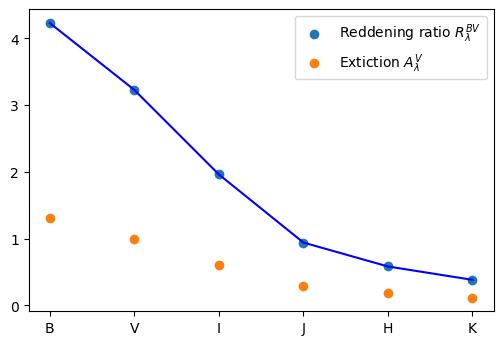

<Figure size 600x400 with 0 Axes>

In [3]:
mag = ['B', 'V', 'I','J','H','K']; 
bands = ['M_B', 'M_V', 'M_I', 'M_J', 'M_H', 'M_K']; band = len(bands);
ap_bands = ['B_mag', 'V_mag' ,'I_mag', 'J_mag', 'H_mag', 'K_mag']
col_dot = ['b.', 'g*', 'y+', 'r*', 'c+', 'g.', 'y+', 'b+'] ; 
col_lin = ['b-', 'g-', 'y-', 'r-', 'c-', 'g-', 'y-', 'b-'] ; 
col_das = ['b--', 'g--', 'y--', 'r--', 'c--', 'g--', 'y--', 'b--']
col_ = ['b', 'g', 'y', 'r', 'c', 'g', 'y', 'b'] ; 
    
#-------------------------------------------------------#
#                     Extinction                        #
#-------------------------------------------------------#
                                                        #Adopting extinction values from Foque(2007) - Table 4
Ab_v = 1.31                                             #          = A_b / A_v
Av_v = 1                                                #          = A_v / A_v
Ai_v = 0.608                                            #          = A_i / A_v
Aj_v = 0.292                                            #          = A_j / A_v
Ah_v = 0.181                                            #          = A_h / A_v
Ak_v = 0.119                                            #          = A_k / A_v

R_v = 3.23                                              #      R_V = A_v / E(B-V) 
R_b = Ab_v*R_v                                          #      R_B = (A_b / A_v) * (A_v / E(B-V)) 
R_i = Ai_v*R_v                                          #          = (A_i / A_v) * (A_v / E(B-V)) 
R_j = Aj_v*R_v                                          #          = (A_j / A_v) * (A_v / E(B-V)) 
R_h = Ah_v*R_v                                          #          = (A_h / A_v) * (A_v / E(B-V)) 
R_k = Ak_v*R_v                                          #          = (A_k / A_v) * (A_v / E(B-V))    

A = [Ab_v, Av_v, Ai_v, Aj_v, Ah_v, Ak_v]; 
R = [R_b, R_v, R_i, R_j, R_h, R_k]; 

print('Reddening Ratio with respect to E(B-V): \n Rb, Rv, Ri, Rj, Rh, Rk:', R)

title = 'extinction_law'
plt.scatter([i for i in range(0,6)], [i for i in R], label='Reddening ratio $R_\lambda^{BV}$')
plt.scatter([i for i in range(0,6)], [i for i in A], label = 'Extiction $A_\lambda^V$')
plt.plot([i for i in range(0,6)], [i for i in R], 'b-')
my_xticks = ['B','V','I','J', 'H', 'K']
plt.xticks([0,1,2,3,4,5], my_xticks)
plt.legend()
plt.show()
save(title)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      110 non-null    object 
 1   logP      110 non-null    float64
 2   mM0_IRSB  110 non-null    float64
 3   EBV       110 non-null    float64
 4   B_mag     110 non-null    float64
 5   V_mag     110 non-null    float64
 6   I_mag     103 non-null    float64
 7   J_mag     110 non-null    float64
 8   H_mag     110 non-null    float64
 9   K_mag     110 non-null    float64
 10  Mb        110 non-null    float64
 11  Mv        110 non-null    float64
 12  Mi        103 non-null    float64
 13  Mj        110 non-null    float64
 14  Mh        110 non-null    float64
 15  Mk        110 non-null    float64
 16  Wvi       103 non-null    float64
 17  Wjk       110 non-null    float64
 18  DR3Name   110 non-null    object 
 19  RAdeg     110 non-null    float64
 20  DEdeg     110 non-null    float6

<Figure size 600x400 with 0 Axes>

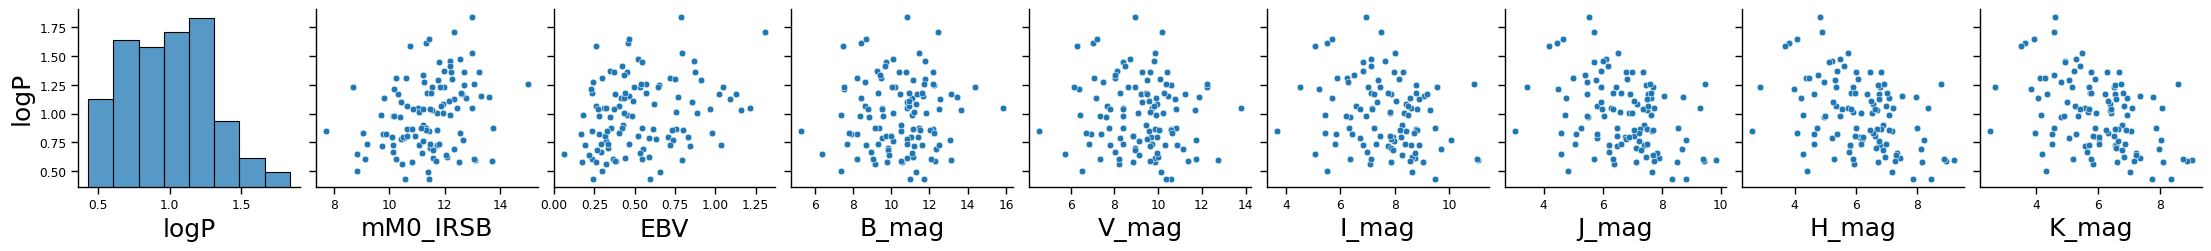

After removing missing datapoints rows, number of stars left:103
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    103 non-null    object 
 1   logP    103 non-null    float64
 2   BV      103 non-null    float64
 3   BI      103 non-null    float64
 4   BJ      103 non-null    float64
 5   BH      103 non-null    float64
 6   BK      103 non-null    float64
 7   VI      103 non-null    float64
 8   VJ      103 non-null    float64
 9   VH      103 non-null    float64
 10  VK      103 non-null    float64
 11  IJ      103 non-null    float64
 12  IH      103 non-null    float64
 13  IK      103 non-null    float64
 14  JH      103 non-null    float64
 15  JK      103 non-null    float64
 16  HK      103 non-null    float64
dtypes: float64(16), object(1)
memory usage: 13.8+ KB


In [9]:
#-------------------------------------------------------------------------------------#
#         Loading data set from Drive or Cloud.                                       #
#data = pd.read_csv("/home/shubham/Desktop/Thesis/Data/target_update.csv")             #
raw_data = pd.read_csv('../Notebooks/Jesper/110_Jesper_RUWE_QLT.csv')
#-------------------------------------------------------------------------------------#
print(raw_data.info())

df = raw_data[["logP", 'mM0_IRSB', 'EBV', "B_mag", 'V_mag', 'I_mag', 'J_mag', 'H_mag', 'K_mag']]
plot_corr(df, 'logP', title = '110_Jesper_RUWE_QLT', s=1, f=18)

# remove incomplete rows and sort stars by period.  
raw_data = raw_data.sort_values(by = ['logP'],ascending=True).dropna().reset_index()

raw_data.to_csv('%s%s%s'%(data_path,str(len(raw_data)),'_raw_data_IRSB.csv'))
color = pd.DataFrame()
color['name']=raw_data['Name']
color['logP']=raw_data['logP']
for i in range(0,6):
    for j in range(i+1,6):
        color[mag[i]+mag[j]] = raw_data[mag[i]+'_mag'] - raw_data[mag[j]+'_mag'] - (R[i]-R[j])*raw_data.EBV
#        plot(color[mag[i]+mag[j]], raw_data.logP, data['mod'],'PC_%s%s'%(mag[i],mag[j]),1)

print('After removing missing datapoints rows, number of stars left:' + str(len(raw_data)))
color.to_csv('%s%s%s'%(data_path,str(len(color)),'_color.csv'))
color.info()

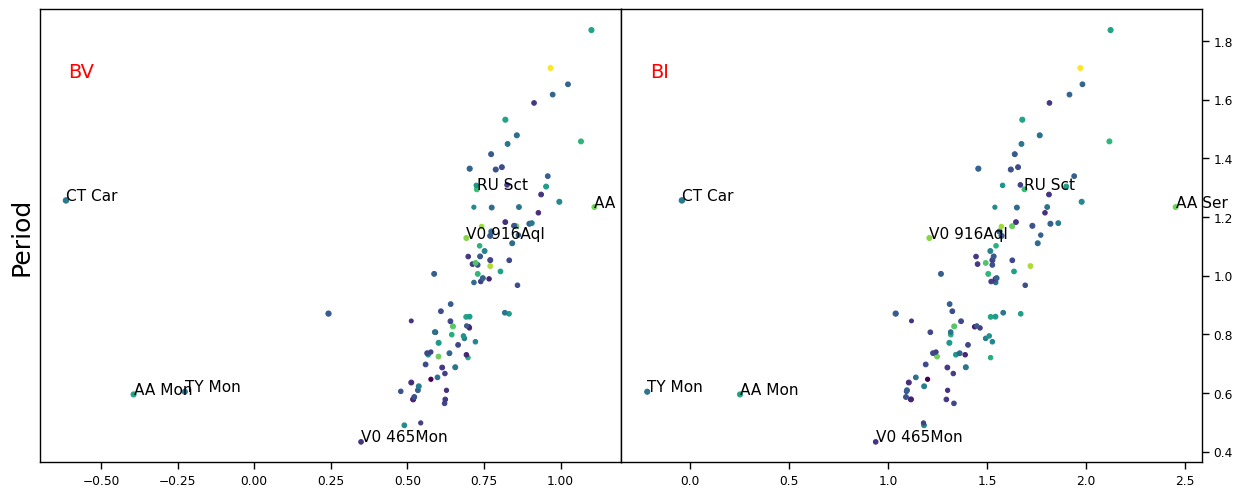

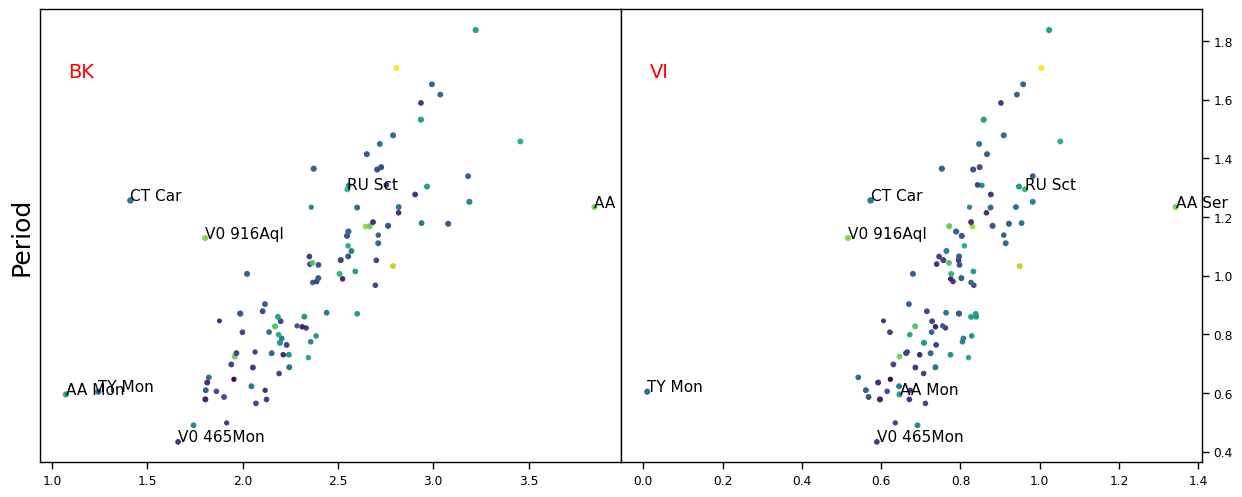

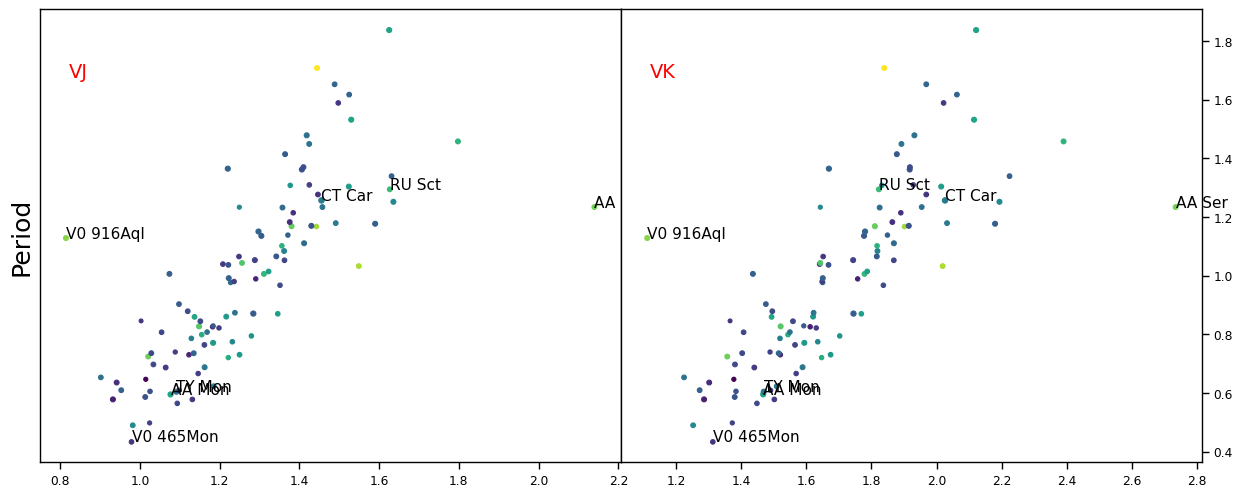

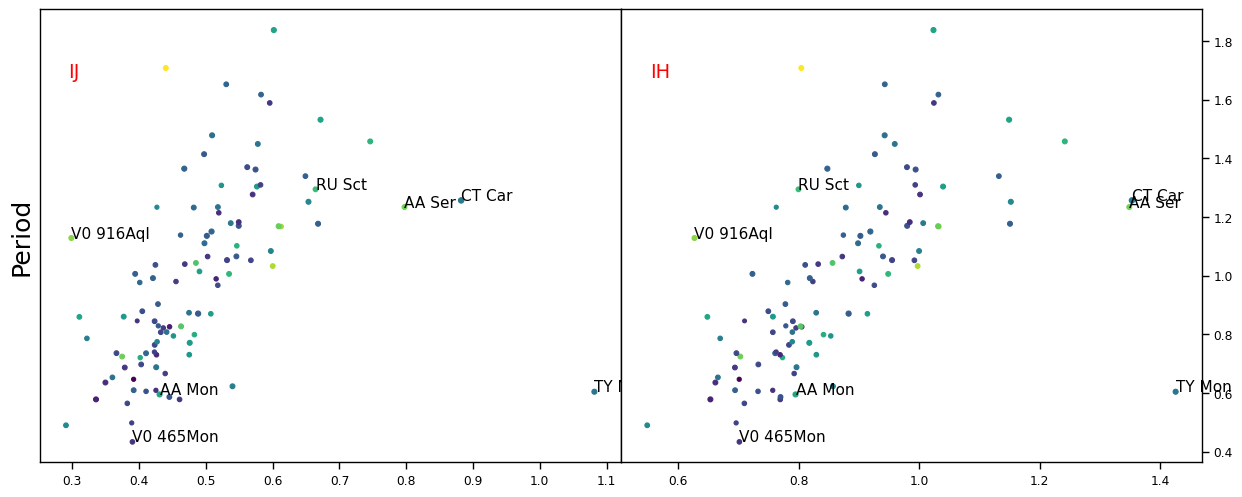

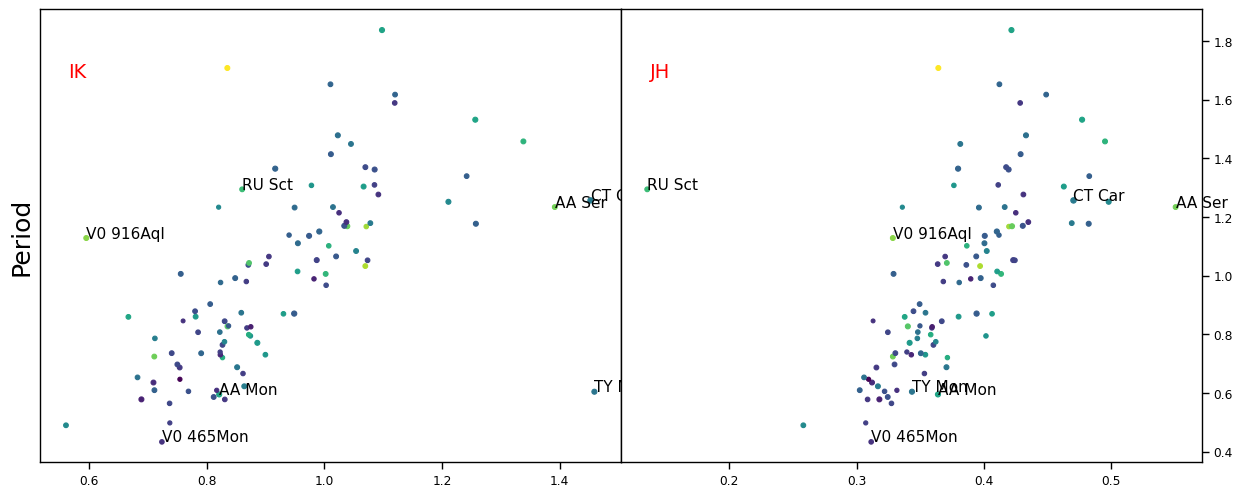

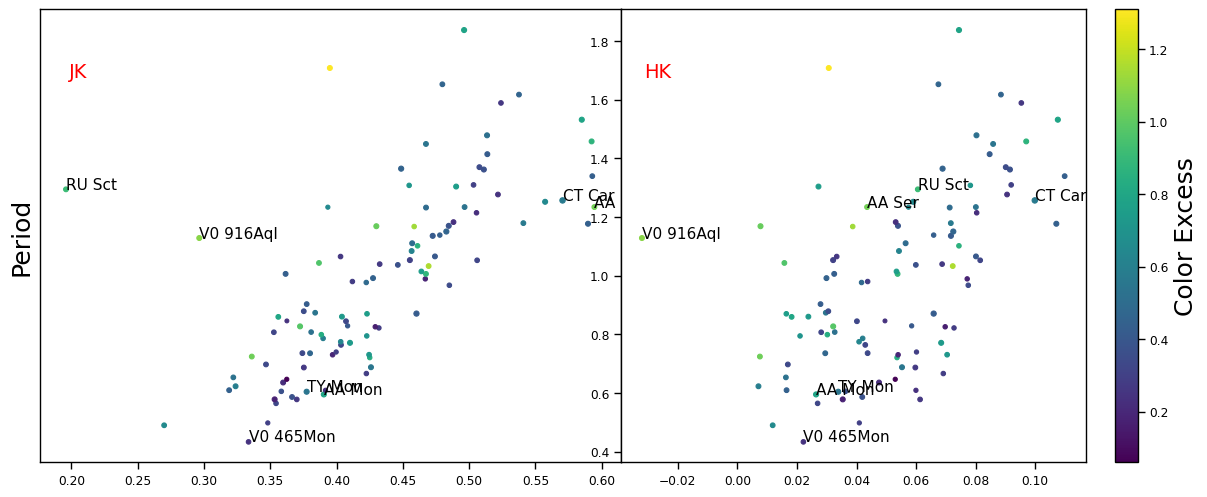

In [8]:
#index of outliers are collected for annotation purpose,  
outliers = [0,7,8,67,81,83,85]

ls = ['BV', 'BI', 'BK', 'VI','VJ','VK','IJ', 'IH', 'IK', 'JH', 'JK', 'HK']
for j in range(0,12,2):
    fig, axarr = plt.subplots(1,2, sharey='col',gridspec_kw={'hspace': 0, 'wspace': 0})
    fig = plt.gcf()
    fig.set_size_inches(15, 6)
    Y = raw_data['logP']
    for i,ax in enumerate(axarr):
#        ax.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False) 
        X = color[ls[i+j]]
        pcm = ax.scatter(X, Y, label='$%s$'%(ls[i+j]), s=raw_data['mM0_IRSB'], c = raw_data['EBV'])
        #ax.legend(loc='upper right', prop={'size':6})
        ax.yaxis.tick_right()
        if i%2 ==0:
            ax.set_ylabel('Period')
        for k in outliers:
            ax.annotate('%s'%(raw_data.Name.iloc[k]), xy =(X.iloc[k], Y.iloc[k]), fontsize = 11) 
        plt.text(0.05, 0.85, '%s'%(ls[i+j]), transform = ax.transAxes, color = "red",  fontsize = 14)      
    save('PC%i_%s'%(j,ls[i+j]))
ax.yaxis.tick_left()
cbar=fig.colorbar(pcm, ax=axarr[1], shrink=1, location='right')
cbar.set_label('Color Excess')
save('PC%i_%s'%(j,ls[i+j]))


In [60]:
raw = raw_data[['Name', 'logP', 'mM0_IRSB', 'EBV', 'B_mag', 'V_mag', 'I_mag', 'J_mag', 'H_mag', 'K_mag']]
cepheid = len(raw)
raw.to_csv('%s%s%s'%(data_path,str(cepheid),'_apparent.csv'))
raw =raw.drop(outliers, axis=0).reset_index()
cepheid = len(raw)
raw.to_csv('%s%s%s'%(data_path,str(cepheid),'_apparent.csv'))
raw

,index,Name,logP,mM0_IRSB,EBV,B_mag,V_mag,I_mag,J_mag,H_mag,K_mag
0,1,EV Sct,0.490098,11.401,0.655,11.290,10.144,8.623,7.664,7.171,7.028
1,2,SZ Tau,0.498166,8.814,0.295,7.365,6.526,5.517,4.827,4.414,4.314
2,3,SS Sct,0.564814,10.447,0.325,9.165,8.218,7.095,6.381,5.937,5.845
3,4,QZ Nor,0.578244,10.811,0.263,9.756,8.869,7.865,7.136,6.733,6.619
4,5,AD Gem,0.578408,12.514,0.173,10.547,9.855,9.039,8.527,8.147,8.077
...,...,...,...,...,...,...,...,...,...,...,...
91,98,UC ar,1.588970,10.752,0.263,7.469,6.292,5.057,4.193,3.670,3.522
92,99,RS Pup,1.617420,11.307,0.457,8.442,7.010,5.489,4.440,3.827,3.647
93,100,SV Vul,1.652569,11.418,0.462,8.700,7.213,5.670,4.668,4.090,3.930
94,101,GY Sge,1.708102,12.340,1.310,12.442,10.163,7.500,5.723,4.889,4.596
